<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**
*From scratch using Python*

K-Means Clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Using Google Drive Mount to access dataset files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [ ]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
df_train.head()

,0,1,...,783,784
0,23,0,...,0,0
1,7,0,...,0,0
2,16,0,...,0,0
3,15,0,...,0,0
4,23,0,...,0,0


Data Frame for testing dataset.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
df_test.head()

,0,1,...,783,784
0,1,0,...,0,0
1,1,0,...,0,0
2,1,0,...,0,0
3,1,0,...,0,0
4,1,0,...,0,0


An array of alphabets with 'A' at index 0 and 'Z' at index 25 to better understand which alphabet is being shown and predicted.

In [ ]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

## Visualising the data
We'll map the pixel brightness with the help of matplotlib and create the image of the alphabets on a graph.

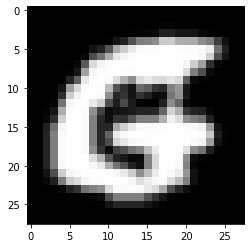

In [ ]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy()
pixels = pixels.reshape((28, 28))
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [ ]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]

In [ ]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]

Defining a function `plot` which will be used to map the brightness of the pixels onto a graph thus showing the alphabet.

In [ ]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

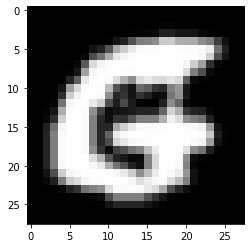

This is G


In [ ]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

## Normalising the Data:
The maximum pixel brightness is 255 and the minimum us 0. So we'll divide the whole array by 255 to get all the entries between 0 and 1.

In [ ]:
def normalise(X):
    result = X/255
    return result

## Distance Function:
To compute the distance between the test example and the training dataset, euclidean distance concept will be used.

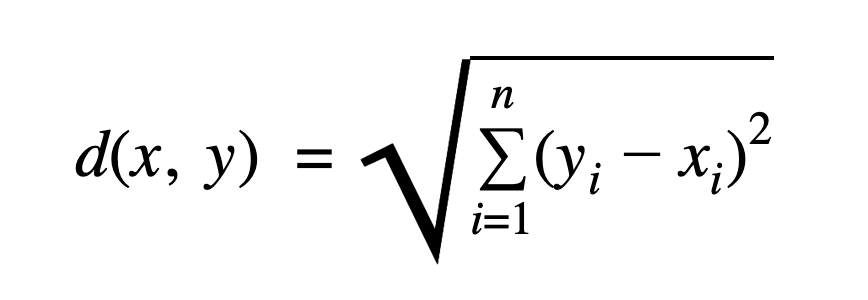

In [ ]:
def euclidean_distance(Centroid, X):
    a = np.square(X - Centroid)
    a = np.sum(a, axis=1)
    a = np.sqrt(a)
    return a.T

### No. of clusters

We'll use the number of unique entries in the labels vector as the number of clusters.

In [ ]:
K = len(np.unique(Y_train))

### Initialising Centroids
Centroids will be initialised to random training example at first.

In [ ]:
Centroid = np.empty((K, X_train.shape[1]))
for i in range(K):
    co = np.random.randint(0, X_train.shape[0])
    Centroid[i] = X_train[co]

## Model:


*   First we calculate the distance of each training example from the centroids.
*   Then we assign the centroid least farther from the training example to it.
*   Then we create a vector for each centroid and update the centroid with the mean of all the cluster members.



In [ ]:
no_of_iter = 50
for i in range(no_of_iter):
    distance = np.empty((X_train.shape[0], 0))
    for k in range(K):
        distance = np.c_[distance, euclidean_distance(Centroid[k].reshape(1, Centroid.shape[1]), X_train)]
    ind = np.argmin(distance, axis=1)
    ind = ind.reshape(-1,1)

    for k in range(K):
        a = np.empty((0, X_train.shape[1]))
        for j in range(X_train.shape[0]):
            if ind[j]==k:
                a = np.vstack((a, X_train[j]))
        Centroid[k] = np.mean(a, axis=0)

Plot to see the cluster formation.

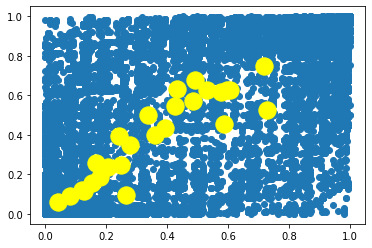

In [ ]:
plt.scatter(normalise(X_train[:, 259]), normalise(X_train[:, 260]))
plt.scatter(normalise(Centroid[:,259]),normalise(Centroid[:,260]),s=300,c='yellow',label='Centroids')
plt.show()